In [20]:
import random
import numpy as np
import pandas as pd
from datetime import timedelta, date
import warnings
warnings.filterwarnings("ignore") 
# Generate synthetic data
start_date = date(2020, 1, 1)
end_date = date(2021, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(100)]
sales_data = [random.randint(1, 50) for _ in range(100)]

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})

# Sort by date and reset index
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Save to CSV
df.to_csv('sales_data.csv', index=False)


Missing Values:
 Sales    0
dtype: int64

Data Types:
 Sales    int64
dtype: object

Summary Statistics:
             Sales
count  100.000000
mean    27.090000
std     14.413865
min      2.000000
25%     15.750000
50%     28.000000
75%     39.000000
max     50.000000

Duplicate Rows:
             Sales
Date             
2020-02-21     24
2020-03-20     31
2020-04-04      7
2020-04-27     19
2020-05-24     44
2020-06-04     18
2020-06-09     24
2020-06-11     26
2020-07-02     12
2020-07-13     45
2020-07-21     49
2020-07-28     17
2020-08-06     12
2020-08-12     36
2020-08-18     49
2020-08-20     12
2020-09-01     31
2020-10-11     12
2020-11-05      5
2020-11-18     19
2020-12-09     45
2020-12-12     36
2020-12-18     33
2021-01-15     44
2021-02-28      5
2021-03-16     39
2021-05-01     41
2021-05-14      5
2021-05-18     36
2021-05-27      3
2021-06-16     10
2021-06-17     31
2021-06-18     35
2021-06-29     10
2021-07-02     19
2021-07-06     35
2021-07-13      5
2021-07-13  

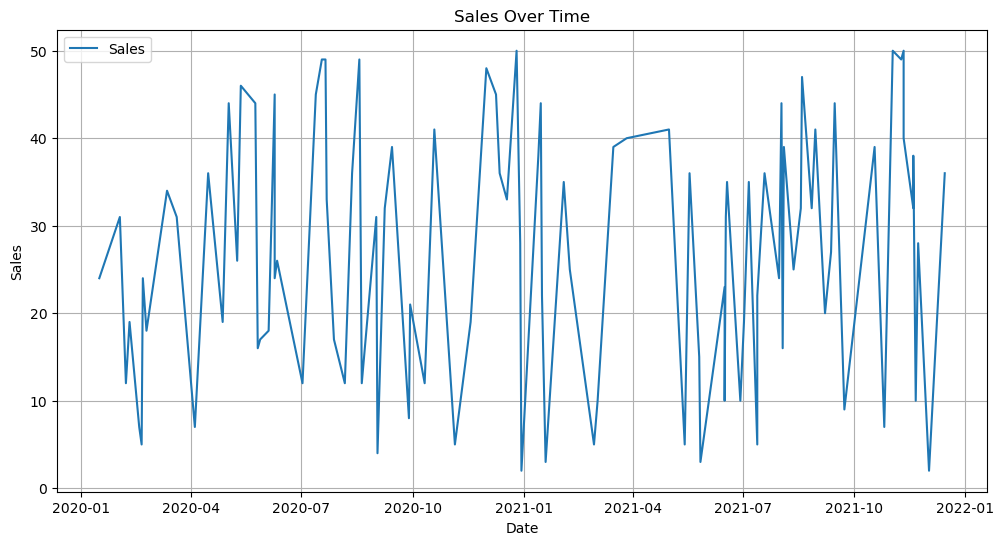

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

data_types = df.dtypes
print("\nData Types:\n", data_types)
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicates)


# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


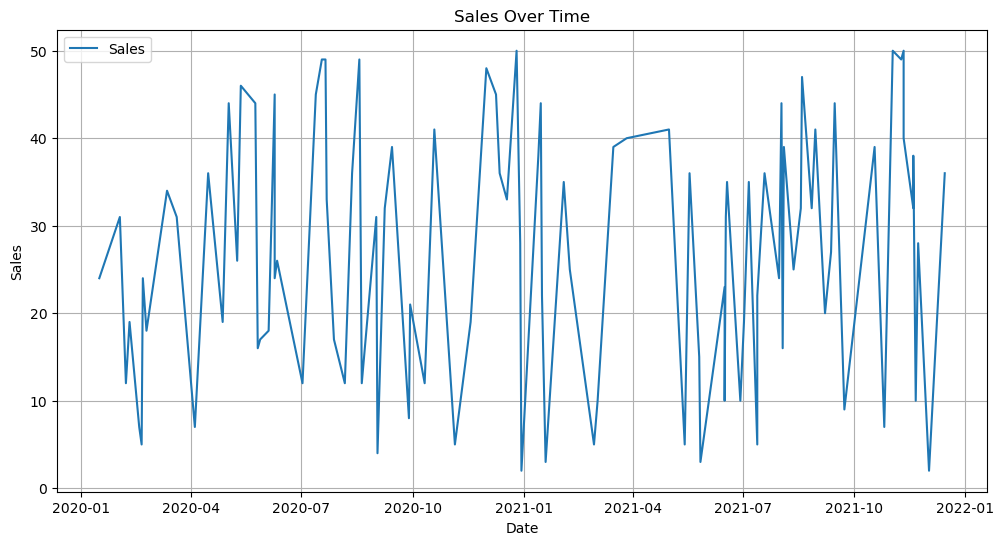

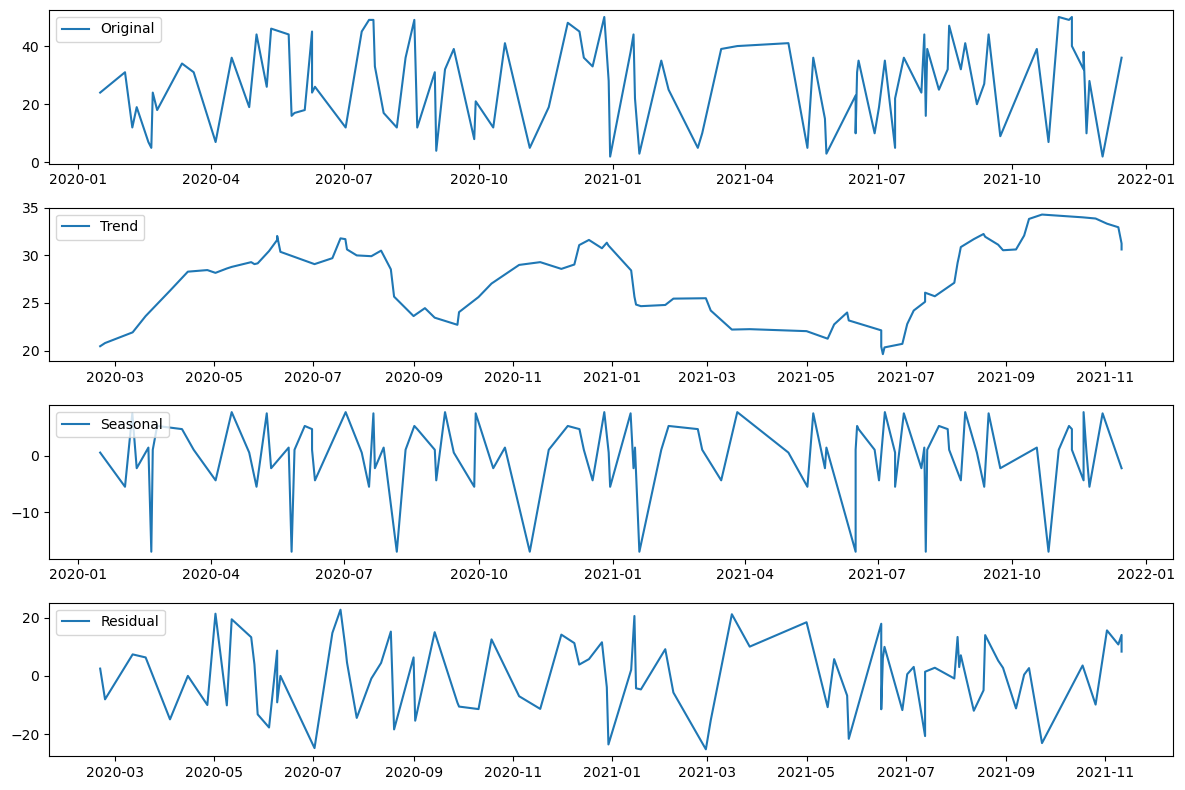

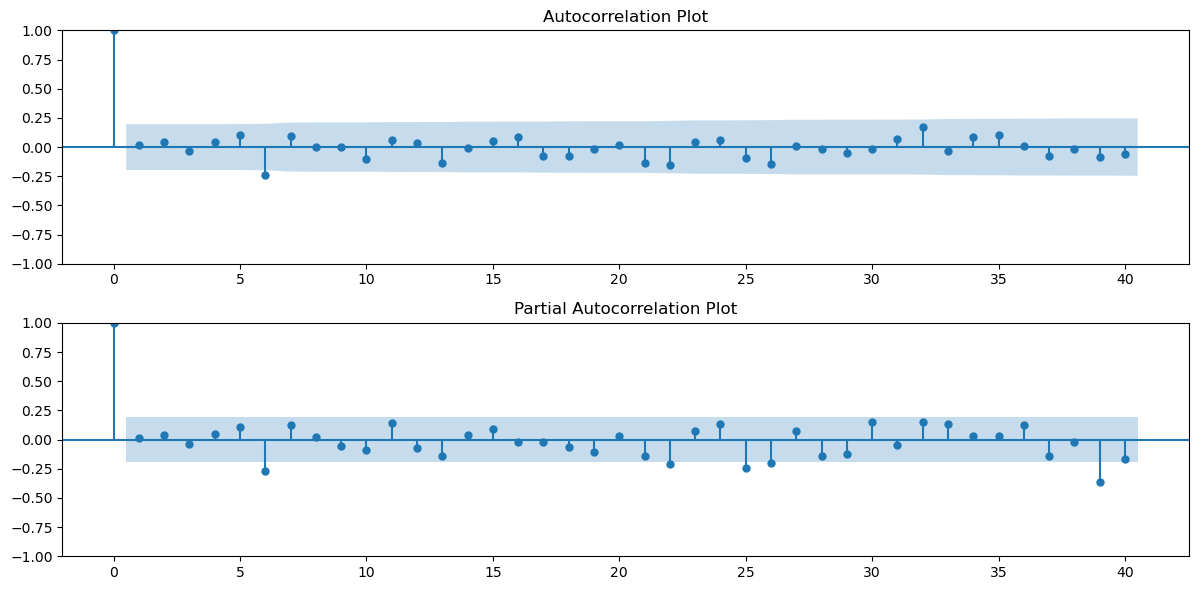

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)  # Assuming monthly data (12 months in a year)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

# Autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['Sales'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')
plt.subplot(2, 1, 2)
plot_pacf(df['Sales'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')
plt.tight_layout()
plt.show()



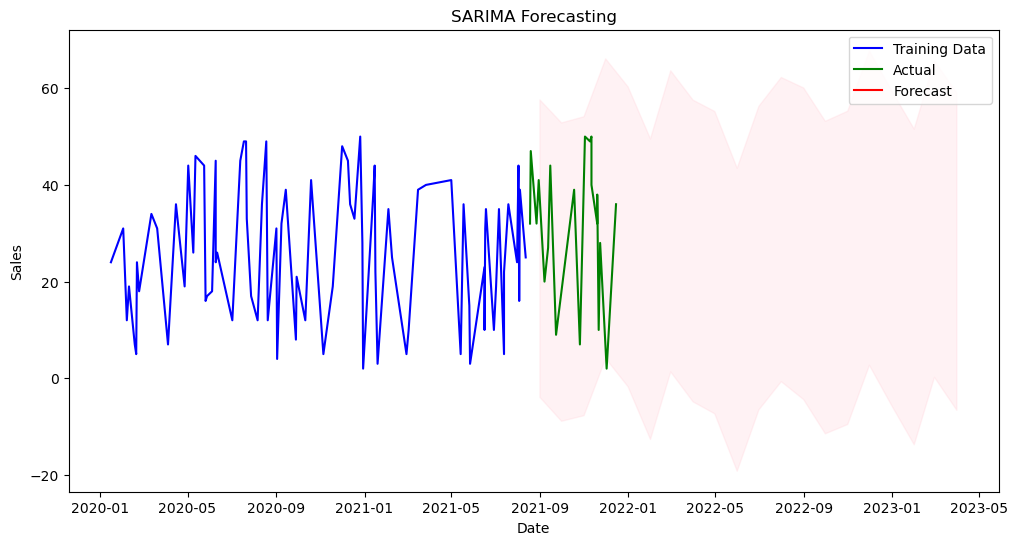

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define model order and seasonal order
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12

# Define train and test data
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Create and fit SARIMA model
sarima_model = SARIMAX(train_data['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test data
forecast_steps = len(test_data)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='M')

# Create a Series for the forecasted values
forecast_series = pd.Series(forecast_values, index=forecast_index)

# Plot the training data, actual data, and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Sales'], label='Actual', color='green')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Forecast on the test data
forecast_steps = len(test_data)
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Calculate RMSE
mse = mean_squared_error(test_data['Sales'], forecast_values)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


RMSE: 15.69
